# Python IUDX SDK - pyIUDX
In this notebook we will use the pyIUDX SDK to interact with IUDX, the India Urban Data Exchange (https://www.iudx.org.in/). IUDX provides easy access to smart city resources, like air quality monitors, smart transportation systems, emergency reporting sensors (flooding), streetlighting metrics, crowd sourced data sources and so on! Along with access, IUDX also provides semantic information about the properties associated with these resources to foster a semantic and wholistic understanding of data. This facilitates richer apps to be developed and provides for intelligent and well integrated analytics.
Visit https://pudx.catalogue.iudx.org.in to explore the dearth of resources available for your consumption.


We encourage you to save a copy on your google drive and try these examples out.


In the first part, we will query and obtain resources as per our requirements. This information is obtained by querying the catalogue server. The catalogue server provides all metadata associated with a sensor, including, sensor type, sensor location, sensor attributes, sensed quantities and their units etc.

In the second part, we will obtain sensed data associated with a set of sensors and perform some simple analytics with it. This section will evoke the power of IUDX and illustrate how dynamic apps and analytics can be developed.

## Install pyIUDX SDK module

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates
import folium

In [42]:
# install the latest version of pyIUDX module from github
pip install git+https://github.com/iudx/pyIUDX

  Cloning https://github.com/iudx/pyIUDX to /tmp/pip-req-build-mazv5jx_
  Running command git clone -q https://github.com/iudx/pyIUDX /tmp/pip-req-build-mazv5jx_
  Created wheel for pyIUDX: filename=pyIUDX-0.0.1-cp36-none-any.whl size=22393 sha256=a285915089beb9afdf2650fda3e7303409e6654b02beda6113d51c96d05d39a6
  Stored in directory: /tmp/pip-ephem-wheel-cache-fnj4klvz/wheels/9a/47/49/4628dcd08582cacb7599b922e10d77572044b4c49fe076e0e8
Successfully built pyIUDX


## Accessing Catalogue server
All sensor properties are stored in the catalogue server. Querying the catalog entry for a given sensor provides us metadata and information about the sensor, particularly:
* The sendor id (the unique id with which we query the sensor information and data)
* Tags associated with the sensor
* Information on the type of data provided by the sensor and their units

### Import *cat* class from *pyIUDX.cat*
The *cat* class provides the APIs to fetch data from the catalogue server.

In [0]:
from pyIUDX.cat import cat

In [0]:
# Specify the catalogue server details.
# initialize a catalogue class
cat = cat.Catalogue("https://pudx.catalogue.iudx.org.in/catalogue/v1")

### Search for catalogue items (sensors)
*getManyResourceItems* member of the catalogue class can be used to fetch a filtered version of catalogue items. The example below shows how to obtain items (sensors) whose tags attribute have the values "aqi" or "aqm". The metadata is returned as a list of dictionary item for each sensor.

In [0]:
attributes = {"tags": ["aqi", "aqm"]}
allAQMItems = cat.getManyResourceItems(attributes)

In [46]:
print(allAQMItems[0:2])

[{'@context': ['https://raw.githubusercontent.com/iudx/iudx-ld/master/data_models/environment/airQuality/env_aqm_climoPune_0.json'], 'onboardedBy': 'Technical consultant at rbccps.org', 'itemDescription': 'Describes Air Quality Monitoring (AQM) Resource.', 'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ABC Farm House Junction_4', 'deviceModelInfo': {'type': 'Property', 'value': {'url': 'http://www.boschclimo.com/', 'brand': 'Climo', 'model': 'Bosch-Climo'}}, 'refBaseSchema': {'type': 'Relationship', 'value': 'https://raw.githubusercontent.com/iudx/iudx-ld/master/base_schemas/v0.0.0/resourceItem_schema.json'}, 'itemType': {'type': 'Property', 'value': 'resourceItem'}, 'tags': {'type': 'Property', 'value': ['environment', 'air quality', 'air', 'aqi', 'aqm', 'climo', 'climate', 'pollution', 'so2', 'co2', 'co', 'no', 'no2', 'pm2.5', 'pm25', 'lux', 'pm10', 'humidity', 'temperature', 'ozone', 'o3', 'noise', 'light', 'uv']}, 'resourceServerGrou

In [0]:
allAQMItemsCount = cat.getItemCount(attributes)

In [48]:
print(allAQMItemsCount)

54


### Filter the catalogue response
An unfiltered call to *getManyResourceItems* will return all information associated with each sensor. Using the filters option, we can filter the information returned.

In the example below, by specifying the filters = ["id"], only the "id" of the sensor is returned.

In [0]:
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters)

In [50]:
print(allAQMItemsByID[0:3])

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ABC Farm House Junction_4'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Ambedkar society circle_29'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Appa_Balwant_Square_30'}]


### Filter items (sensors) by geo-location
The function *getManyResourceItems* can also be used to filter items (sensors) based on their locations. In the example below, we specify the area of interest as a circle with center specified by latitude ("lat") and longitude ("lon") and radius in meters.
In this case, we are requesting for sensors around a 3km radius.
We also will specify that we are specifically interested in Air Quality Monitoring Stations present in that region.
We only require the ID's for now, which we can obtain by passing a filters option

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 3000}}
attributes = {"tags": ["aqm"]}
filters = ["id"]


The below call returns all sensors with tags "aqi" or "aqm" and within the geographical area specified. Further, as specified by the filters argument, only the "id" information is returned for each of the sensors.


In [0]:
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)

In [53]:
print(allAQMItemsByID)
print("Number of items = ", len(allAQMItemsByID))

[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Goodluck Square_Cafe_23'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune_ST_Stand_40'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune Railway Station_28'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Pune Railway Station_29'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Sadhu_Wasvani_Square_24'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/RTO Square_8'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Appa_Balwant_Square_30'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Chitale Bandhu Corner_41'}, {'id': 'rbccps.org/aa9d66

## Fetch data from sensors
In this section we will fetch sensor data from the resource server and show off a little bit of the magic of IUDX.

### Import *item* class from *pyIUDX.rs*
The *item* class provides the APIs to access relevant sensor data.
This is a high level abstraction module which encapsulates multiple functionalities of IUDX such as fetching meta information from data models and live data from  resource servers

In [0]:
# Import the item class from pyIUDX.rs
from pyIUDX.rs import item


### Plot sensor locations

We can pass the previously obtained list of filtered Air Quality Monitoring stations to the Items class. This will load a list of resourceItem objects and provide neat access to their data.

In [0]:
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 3000}}
attributes = {"tags": ["aqm"]}
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)

In [56]:


m = folium.Map(location=[18.5204,73.8567],zoom_start=12)
aqms = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", allAQMItemsByID)
print(aqms[0].geoProperties)
for sensor in aqms:
  sensor_id = sensor.id  
  print("Sensor location = ", sensor.location.coordinates)
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(m)    
m

['location']
Sensor location =  [73.841424, 18.517439]
Sensor location =  [73.874537, 18.528311]
Sensor location =  [73.8723841, 18.527615]
Sensor location =  [73.874537, 18.528311]
Sensor location =  [73.876484, 18.525007]
Sensor location =  [73.863395, 18.529578]
Sensor location =  [73.854009, 18.516644]
Sensor location =  [73.8525898, 18.5137013]
Sensor location =  [73.842727, 18.516163]
Sensor location =  [73.8494754, 18.5320014]
Sensor location =  [73.8480461, 18.522622]
Sensor location =  [73.84992, 18.530344]


### Fetch Quantitative Properties 
We will iterate across the list of sensors and obtain *PM10_MAX* values and its meta-information. Further, we will also obtain data for a specified duration.

Let's use one of the items form the list of sensors we just created

In [57]:
print(aqms[0].id)

rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Goodluck Square_Cafe_23


We can find out all the QuantitativeProperties (measured properties) of an aqm item by calling the Object.quantitativeProperties property.
Since our previous filter filtered out all AQM sensors, we can assume that the quantitative properties for sensor aqms[0] is the same for the rest.

In [58]:
print(aqms[0].quantitativeProperties)

['AIR_PRESSURE', 'AQI', 'CO2_MAX', 'CO2_MIN', 'CO_MAX', 'CO_MIN', 'HUMIDITY', 'LIGHT', 'NO2_MAX', 'NO2_MIN', 'NO_MAX', 'NO_MIN', 'OZONE_MAX', 'OZONE_MIN', 'PM10_MAX', 'PM10_MIN', 'PM2_MAX', 'PM2_MIN', 'SO2_MAX', 'SO2_MIN', 'TEMPRATURE_MAX', 'UV_MAX', 'UV_MIN']


A quantitativeProperty also has further meta information related to that property, such as a detailed description, units, etc.
We can get a list of such attributes for a quantitativeProperty, and access them directly.
For e.g, for PM10_MAX.


In [59]:
print(aqms[0].CO2_MAX.attributes)
print("Name of the property is " + aqms[0].CO2_MAX.symbol)
print("Units of the property are " + aqms[0].CO2_MAX.symbol)
print("The property tells us the " + aqms[0].CO2_MAX.describes)

{'name': 'CO2_MAX', 'describes': 'Maximum value of CO2 for the last 24 hours', 'symbol': 'ppm', 'unitCode': 'X59', 'unitText': 'part per million (ppm)'}
Name of the property is ppm
Units of the property are ppm
The property tells us the Maximum value of CO2 for the last 24 hours


We need to call the object's latest() method to get the latest data .
Calling aqms.latest() will update the latest values of all these properties and for **all the previously filtered sensors**.

In [60]:
aqms.latest()

<Items [<pyIUDX.rs.item.Item object at 0x7f8d85452828>, <pyIUDX.rs.item.Item object at 0x7f8d85439588>, <pyIUDX.rs.item.Item object at 0x7f8d85448dd8>, <pyIUDX.rs.item.Item object at 0x7f8d8302b518>, <pyIUDX.rs.item.Item object at 0x7f8d84b536a0>, <pyIUDX.rs.item.Item object at 0x7f8d832baf60>, <pyIUDX.rs.item.Item object at 0x7f8d8329d898>, <pyIUDX.rs.item.Item object at 0x7f8d832a4b00>, <pyIUDX.rs.item.Item object at 0x7f8d8329d2b0>, <pyIUDX.rs.item.Item object at 0x7f8d832a4898>, <pyIUDX.rs.item.Item object at 0x7f8d832a4cc0>, <pyIUDX.rs.item.Item object at 0x7f8d832b4588>]>

We can now call aqms[0]."quantitativeProperty".value to obtain a numpy array with the first column as datetime and second column as that property's value.
A quantitativeProperty always has a .value attribute.


In [61]:
aqms[0].CO2_MAX.value

array([[datetime.datetime(2019, 11, 7, 17, 0, 47, 553000), 267.0]],
      dtype=object)

Calling latest() once is enough. We can access other quantitativeProperties as well.

In [62]:
aqms[0].SO2_MAX.value

array([[datetime.datetime(2019, 11, 7, 17, 0, 47, 553000), 2.0]],
      dtype=object)

Supposing there is a need to find the trend of a particular property over a period of time. We can use Items object's during() functionality to show a time series view of that quantitativeProperty. We need to specify the start and end time in utc format. Let's get the data during 25th October 2019 and 2nd November 2019.

In [63]:
aqms.during("2019-10-26T00:00:00.000+05:30", "2019-11-02T00:00:00.000+05:30")



<Items [<pyIUDX.rs.item.Item object at 0x7f8d82e552b0>, <pyIUDX.rs.item.Item object at 0x7f8d82d6d6d8>, <pyIUDX.rs.item.Item object at 0x7f8d82e40a20>, <pyIUDX.rs.item.Item object at 0x7f8d82e2f7f0>, <pyIUDX.rs.item.Item object at 0x7f8d82d4e048>, <pyIUDX.rs.item.Item object at 0x7f8d82d4e080>, <pyIUDX.rs.item.Item object at 0x7f8d82bdb630>, <pyIUDX.rs.item.Item object at 0x7f8d82b860b8>, <pyIUDX.rs.item.Item object at 0x7f8d82add6a0>, <pyIUDX.rs.item.Item object at 0x7f8d82a9e748>, <pyIUDX.rs.item.Item object at 0x7f8d829f55f8>, <pyIUDX.rs.item.Item object at 0x7f8d829b55c0>]>

Now we can repeat what we did earlier and find the value of the quantitativeProperty **during** that period of time for **sensor 1**

In [64]:
print(aqms[1].PM10_MAX.value[0:10,:])

[[datetime.datetime(2019, 10, 26, 0, 12, 55) 13.0]
 [datetime.datetime(2019, 10, 26, 0, 27, 57) 13.0]
 [datetime.datetime(2019, 10, 26, 0, 42, 55) 12.0]
 [datetime.datetime(2019, 10, 26, 0, 57, 54) 12.0]
 [datetime.datetime(2019, 10, 26, 1, 12, 57) 12.0]
 [datetime.datetime(2019, 10, 26, 1, 27, 59) 12.0]
 [datetime.datetime(2019, 10, 26, 1, 42, 53) 12.0]
 [datetime.datetime(2019, 10, 26, 2, 46, 19) 12.0]
 [datetime.datetime(2019, 10, 26, 3, 16, 18) 12.0]
 [datetime.datetime(2019, 10, 26, 3, 46, 16) 12.0]]


We can utilize all of the other meta information that's part of the object and plot it right away!

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'PM10_MAX (ug/m3)')

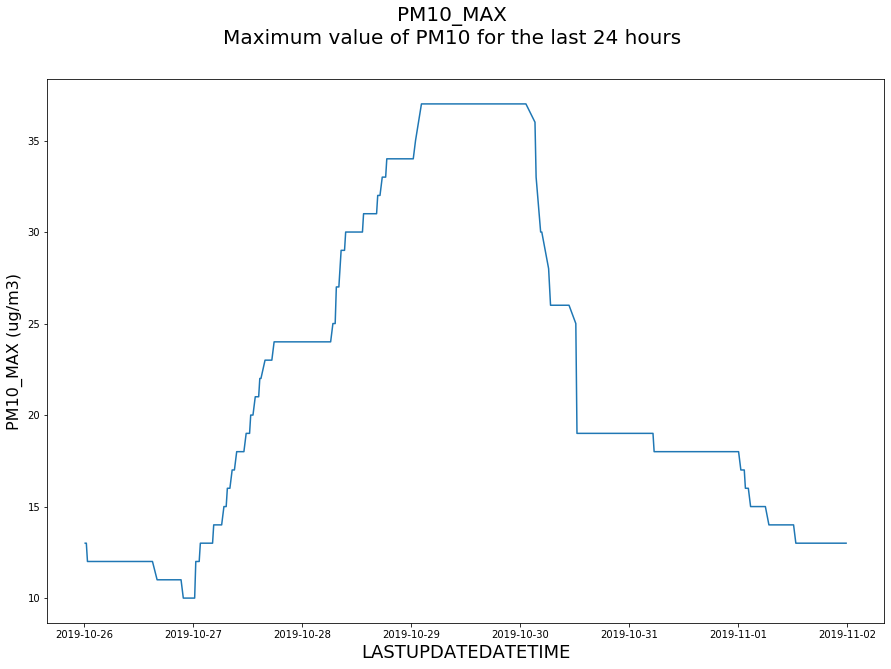

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))

fig.suptitle(aqms[1].PM10_MAX.name + "\n" + aqms[1].PM10_MAX.describes, fontsize=20)
plt.plot(aqms[1].PM10_MAX.value[:,0], aqms[1].PM10_MAX.value[:,1])
plt.xlabel(aqms[1].timeProperty, fontsize=18)
plt.ylabel(aqms[1].PM10_MAX.name + " (" + aqms[1].PM10_MAX.symbol + ")", fontsize=16)

### IUDX Magic!
We can repeat the above for all the selected sensors!
Dynamically populating the x and y axis, showing the units of measurement and many more!

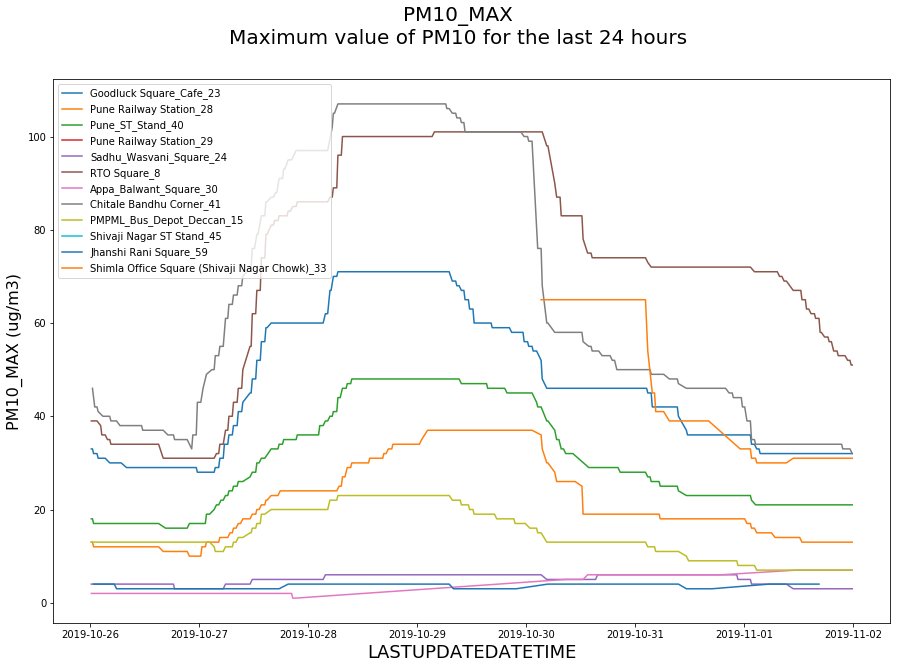

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
fig.suptitle(aqms[0].PM10_MAX.name + "\n" + aqms[0].PM10_MAX.describes, fontsize=20)
plt.xlabel(aqms[0].timeProperty, fontsize=18)
plt.ylabel(aqms[0].PM10_MAX.name + " (" + aqms[0].PM10_MAX.symbol + ")", fontsize=16)

for sensor in aqms:
  plt.plot(sensor.PM10_MAX.value[:,0], sensor.PM10_MAX.value[:,1], label=sensor.id.split("/")[-1])
plt.legend()
plt.show()

Notice how the pollution significantly peaks around deepavali (28th-30th october)!

### Geo-spatial analytics with IUDX
Let's do something a bit more advance. 
Let's plot the geo-spatial distrubution of PM10 across the entire city of Pune.

Install a few dependencies and import a few libraries.

In [67]:
!pip install geojsoncontour


In [0]:
from folium import plugins
import geojsoncontour
import scipy.ndimage
import scipy as sp
from scipy.interpolate import griddata



Let's extend our analysis to a large area, about 60 kms in diameter. This covers most Pune city.
Again, we use the catalogue to filter out sensors within a wide region and pass it to the Items class.

In [69]:
from pyIUDX.rs import item
geo1 = {"circle": {"lat": 18.539107, "lon": 73.853987, "radius": 30000}}
attributes = {"tags": ["aqm"]}
filters = ["id"]
allAQMItemsByID = cat.getManyResourceItems(attributes, filters, geo=geo1)
print(allAQMItemsByID)
aqms = item.Items("https://pudx.catalogue.iudx.org.in/catalogue/v1", allAQMItemsByID)



[{'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Nanded City Entry_42'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Sadanand Hotel Square_39'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Chandani Square_25'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Susgaon_46'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Bremen Square_37'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/BopadiSquare_65'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/ChurchKhadakiRailwayStation_36'}, {'id': 'rbccps.org/aa9d66a000d94a78895de8d4c0b3a67f3450e531/pudx-resource-server/aqm-bosch-climo/Goodluck Square_Cafe_23'}, {'id': 'rbccps.org/aa9d66a000d94a78

Let's now get the latest data from these sensors.
This will take about 30 seconds on the cloud

In [70]:
aqms.latest()

<Items [<pyIUDX.rs.item.Item object at 0x7f8d77906240>, <pyIUDX.rs.item.Item object at 0x7f8d778ab630>, <pyIUDX.rs.item.Item object at 0x7f8d778b1f28>, <pyIUDX.rs.item.Item object at 0x7f8d7797a898>, <pyIUDX.rs.item.Item object at 0x7f8d778dcf98>, <pyIUDX.rs.item.Item object at 0x7f8d778ea8d0>, <pyIUDX.rs.item.Item object at 0x7f8d7791c390>, <pyIUDX.rs.item.Item object at 0x7f8d77906b00>, <pyIUDX.rs.item.Item object at 0x7f8d77910470>, <pyIUDX.rs.item.Item object at 0x7f8d77906160>, <pyIUDX.rs.item.Item object at 0x7f8d778d20b8>, <pyIUDX.rs.item.Item object at 0x7f8d778589b0>, <pyIUDX.rs.item.Item object at 0x7f8d779062b0>, <pyIUDX.rs.item.Item object at 0x7f8d77874b70>, <pyIUDX.rs.item.Item object at 0x7f8d778814a8>, <pyIUDX.rs.item.Item object at 0x7f8d779060f0>, <pyIUDX.rs.item.Item object at 0x7f8d7781e710>, <pyIUDX.rs.item.Item object at 0x7f8d77823f98>, <pyIUDX.rs.item.Item object at 0x7f8d778cd320>, <pyIUDX.rs.item.Item object at 0x7f8d77841198>, <pyIUDX.rs.item.Item object at 0

Make numpy arrays of all the items locations and values.

In [0]:
# Get the latest PM_10 values for all aqms
zs = []
x_orig = []
y_orig = []
for aqm in aqms:
  val = aqm.PM10_MAX.value[:, 1].astype("float")
  if val.size > 0:
    zs.append(val[0])
    x_orig.append(aqm.location.coordinates[0])
    y_orig.append(aqm.location.coordinates[1])

x_orig = np.array(x_orig)
y_orig = np.array(y_orig)
zs = np.array(zs)

Initialize the map and show all sensor locations

In [72]:
# Initialize the map
geomap = folium.Map([y_orig.mean(), x_orig.mean()], zoom_start=13, tiles="cartodbpositron")

for sensor in aqms:
  sensor_id = sensor.id  
  folium.Marker([sensor.location.coordinates[1], sensor.location.coordinates[0] ], popup=sensor_id).add_to(geomap)  

geomap  

We are now ready to perform the analytic. 
This is a rather simple example where we perform cubic geo-spatial interplation of PM10_MAX concentrations across Pune. We will see where the major pollutant hotspots are located

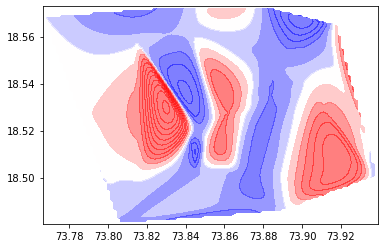

In [73]:
# Make lat and lon linspace
y_arr = np.linspace(np.min(y_orig), np.max(y_orig), 100)
x_arr = np.linspace(np.min(x_orig), np.max(x_orig), 100)
# Make mesh grid
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)


# Perform cubic interpolation
z_mesh = griddata((x_orig, y_orig), zs, (x_mesh, y_mesh), method='cubic')
# Number of levels of colors
levels = 20
# Make contours of the fird value obtained in z_mesh
contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, cmap="bwr", linestyles='None', vmin=0, vmax=100)

# Convert matplotlib contourf to geojson
geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.5)

# Plot the contour plot on folium
folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   0.6,
    }).add_to(geomap)

# Show map
geomap


# Conclusion

To recap, we've shown you a simple flow of obtaining the different sensors available in a region using the Catalogue module. We've taken this information and passed it to the Items module which provides a complex abstraction over the selected items and makes data access simple. We've then gone on to plot the different quantitative properties for an air quality monitor across the city and used IUDX's magic to dynamically give us the units, locations, and information about a pollutant, PM 10. Lastly we showed how IUDX makes complex analytics simple by helping discover and handle data. 

We encourage you to download this notebook and tinker around. Feedback is welcome. Visit https://github.com/iudx/pyIUDX for more advance usage and report errors/enhancement requests.